In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

# The Human Eye

# Gray Scale Images

In [3]:
FILEPATH = "../misc/7.2.01.tiff"
img = mpimg.imread(FILEPATH)

## Q1

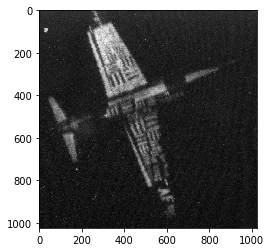

In [4]:
plt.imshow(img, cmap='gray',interpolation='none')

## Q2

In [5]:
minimum_pixel = np.min(img)
maximum_pixel = np.max(img)
print("Maximum pixel value is {} and Minimum value is {} .".format(maximum_pixel, minimum_pixel))

Nbits = int(np.ceil(np.log2(maximum_pixel)))
print("{} bits are used per pixel.".format(Nbits))

Npixels = img.shape[0]*img.shape[1]
print("Resolution of the image is {}x{}, In total of {} pixels are used.".format(img.shape[0], img.shape[1], Npixels))

Maximum pixel value is 192 and Minimum value is 4 .
8 bits are used per pixel.
Resolution of the image is 1024x1024, In total of 1048576 pixels are used.


## Q3

In [6]:
import os

csize = os.path.getsize(FILEPATH)
print("Size of compressed is {} bytes.".format(csize))
print("The compressed image is {}% more than calculated size.".format(((8*csize/(Npixels*Nbits))-1)*100))

Size of compressed is 1048710 bytes.
The compressed image is 0.01277923583984375% more than calculated size.


## Q4

In [7]:
def get_b_coeff(n, b):
    n >>= b
    return n%2

def display_b_plane(I, b):
    bin_img = I.copy()
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            bin_img[i, j] = get_b_coeff(I[i, j], b)
    plt.imshow(bin_img, cmap='gray')
    plt.title("{} Plane".format(b))
    return 
    

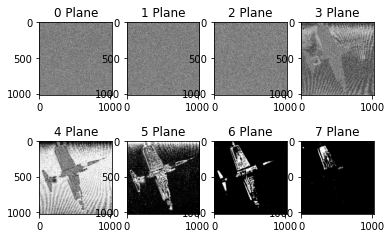

In [8]:
for i in range(Nbits):
    plt.subplot(2, 4, 1+i)
    display_b_plane(img, i)

# Binary Image Processing

## Q1

In [9]:
def histogram(I, Nbits):
    counter = np.zeros(2**Nbits)
    
    for i in I.ravel():
        counter[i] += 1
    return np.array([np.arange(2**Nbits), counter]) 

<BarContainer object of 256 artists>

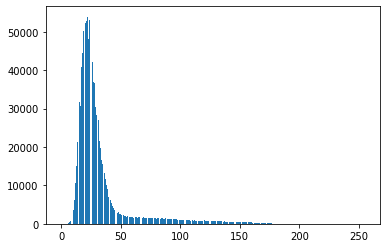

In [10]:
hist = histogram(img, Nbits)
plt.bar(hist[0], hist[1])

## Q2

In [13]:
def thresh(I, T):
    return (I>T).astype(int)

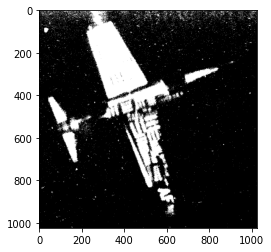

In [33]:
bin_img = thresh(img, 40)
plt.imshow(bin_img, cmap='gray')

## Q3 (a)

## Q3 (b)

## Q4

In [23]:
def complement(bin_I):
    for i in range(bin_I.shape[0]):
        for j in range(bin_I.shape[1]):
            bin_I[i, j] = not bin_I[i, j]
    return bin_I

def connected_component(bin_I):
    R = np.zeros(bin_I.shape)
    k = 0
    for i in range(bin_I.shape[0]):
        for j in range(bin_I.shape[1]):
            if(i == 0 and j == 0):
                if(bin_I[0, 0] == 0):
                    R[i, j] = k
                    k += 1
            elif(i == 0):
                if(bin_I[i, j-1] == 0 and bin_I[i, j] == 0):
                    R[i, j] = R[i, j-1]
                elif(bin_I[i, j] == 0):
                    R[i, j] = k
                    k += 1
            elif(j == 0):
                if(bin_I[i-1, j] == 0 and bin_I[i, j] == 0):
                    R[i, j] = R[i-1, j]
                elif(bin_I[i, j] == 0):
                    R[i, j] = k
                    k += 1
            else:
                if(bin_I[i, j] == 0):
                    if(bin_I[i-1, j] == 0 and bin_I[i, j-1] == 0):
                        R[i, j] = min(R[i-1, j], R[i, j-1])
                    elif(bin_I[i-1, j] == 0):
                        R[i, j] = R[i-1, j]
                    elif(bin_I[i, j-1] == 0):
                        R[i, j] = R[i, j-1]
                    else:
                        R[i, j] = k
                        k += 1
    return R

In [34]:
c_bin_img = complement(bin_img)
R = connected_component(c_bin_img)

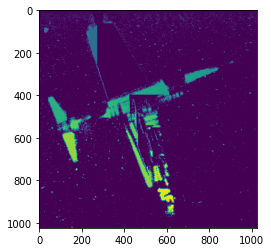

In [35]:
plt.imshow(R)

10521

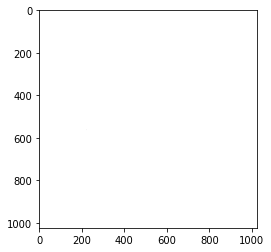

In [53]:
(labels, area) = np.unique(R, return_counts=True)
plt.imshow(np.logical_not(R == labels[np.argmax(area[1:])]), cmap='gray')
np.argmax(area[1:])

## Q5